In [1]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid', {
    'grid.linestyle': '--',
    'grid.alpha': 0.4
})

plt.style.use('seaborn-v0_8-bright')
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'Times New Roman'
plt.rcParams.update({
    'font.size': 12,
    'axes.titlesize': 14,
    'axes.labelsize': 12,
    'legend.fontsize': 10,
    # 'xtick.rotation': 45,
    'xtick.labelsize': 10,
    'ytick.labelsize': 10,
    'figure.autolayout': False,  # we’ll call tight_layout() explicitly
})

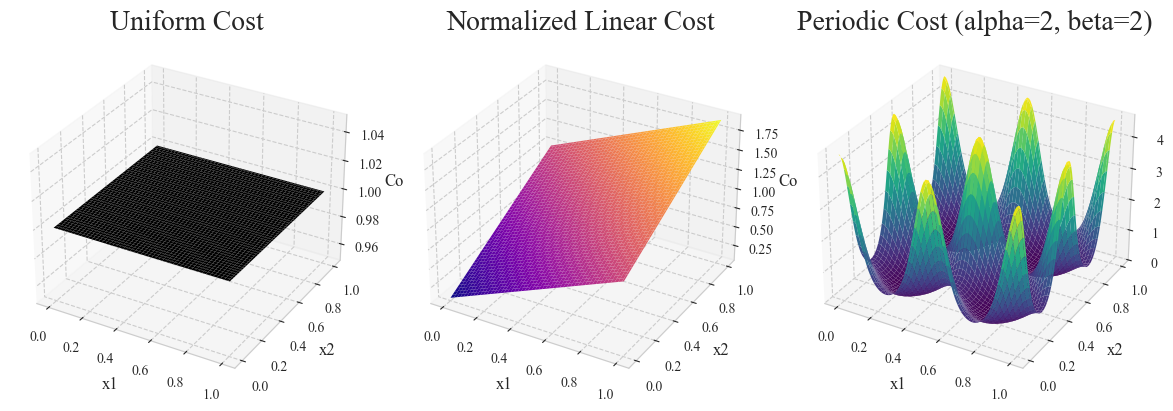

In [10]:

# Cost Function Visualization in 2D (3D Surface Plots)

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.special import i0

# Parameters
alpha = 2.0
beta = 2.0
gamma = 0.0
global_optimum = np.array([0.5, 0.5])
dim = 2

# Create grid over [0, 1]^2
grid_size = 100
x1 = np.linspace(0, 1, grid_size)
x2 = np.linspace(0, 1, grid_size)
X1, X2 = np.meshgrid(x1, x2)
X = np.stack([X1, X2], axis=-1)  # shape (grid_size, grid_size, 2)
X_flat = X.reshape(-1, 2)

# --- Uniform cost ---
uniform_cost = np.ones((grid_size, grid_size))

# --- Linear cost ---
linear_cost = (1 + 20 * X_flat.mean(axis=1)) / (1 + 10)
linear_cost = linear_cost.reshape(grid_size, grid_size)

# --- Periodic cost ---
delta = X_flat - global_optimum + gamma
cosine_term = np.cos(2 * np.pi * beta * delta)
periodic_cost = np.exp(alpha * cosine_term.sum(axis=1) / dim)
normalizer = i0(alpha / dim) ** dim
periodic_cost /= normalizer
periodic_cost = periodic_cost.reshape(grid_size, grid_size)

# --- Plotting ---
fig = plt.figure(figsize=(12, 4))

# Uniform
ax1 = fig.add_subplot(131, projection='3d')
ax1.plot_surface(X1, X2, uniform_cost, cmap='gray', edgecolor='none')
ax1.set_title('Uniform Cost', fontsize=20)
ax1.set_xlabel('x1')
ax1.set_ylabel('x2')
ax1.set_zlabel('Cost')

# Linear
ax2 = fig.add_subplot(132, projection='3d')
ax2.plot_surface(X1, X2, linear_cost, cmap='plasma', edgecolor='none')
ax2.set_title('Normalized Linear Cost', fontsize=20)
ax2.set_xlabel('x1')
ax2.set_ylabel('x2')
ax2.set_zlabel('Cost')

# Periodic
ax3 = fig.add_subplot(133, projection='3d')
ax3.plot_surface(X1, X2, periodic_cost, cmap='viridis', edgecolor='none')
ax3.set_title('Periodic Cost (alpha=2, beta=2)', fontsize=20)
ax3.set_xlabel('x1')
ax3.set_ylabel('x2')
ax3.set_zlabel('Cost')

plt.tight_layout()
plt.savefig("../plots/visualize_cost.pdf", dpi=300, bbox_inches='tight')
plt.show()
